## Ankle Calculation
With this Notebook we read out the Data from every .csv-File in the given directory (csv_files), store it into multiple DFs and visulize it. 

* We get an initial overview of the data and their anomalies. 
* We select the relevant points for the upcoming tasks and compare them in different situations.
* We carry out an initial univariate outlier detection, in which we identify and visualize abnormalities.

Requirements
* .csv-Files

In [1044]:
csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)
for fileName in csvFiles:
    pre, ext = os.path.splitext(fileName)
    print(pre)

Gehen_1
Gehen_4
Gehen_5
Gehen_7
Joggen_1
Joggen_4
Joggen_5
Joggen_7
Laufen_1
Laufen_4
Laufen_5
Laufen_7


In [1045]:
RUN = "Joggen_7" 

## Setup

In [1046]:
import os
import pandas as pd
import numpy as np
import warnings
import pickle
import statistics
warnings.filterwarnings('ignore')

### Get Data
* Reading Data from all CSV Files and save it to multiple Dataframes. 
* Storing every df into a Dictionary for further purposes

In [1047]:
df_dict_all = {}

csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)

for fileName in csvFiles:
    #print(fileName)
    pre, ext = os.path.splitext(fileName)
    file = csvFilesPath + fileName

    # if "Joggen" in pre:
    #     df = pd.read_csv(file)
    #     df_dict_all[pre] = df
    #     if len(df) < 1798:
    #         print(pre)

    df = pd.read_csv(file)
    df_dict_all[pre] = df
    if len(df) < 1798:
        print(pre)

amountDataframes = len(df_dict_all)
amountColumns = len(df.columns.tolist())
amountRows = len(df)
amountData = amountDataframes*amountColumns*amountRows

print(f'{amountDataframes} DataFrames')
print(f'{amountColumns} columns per Dataframe ')
print(f'{amountRows} rows per Dataframe')
print(f'{amountData} DataCells')

12 DataFrames
41 columns per Dataframe 
1799 rows per Dataframe
885108 DataCells


* 10 Runner
* 3 paces per runner
* 2 perspectives per pace 
> 10 x 3 x 2 = 60 Dataframes


* 1800 Frames per Dataframe --> 1800 Frames / 60 seconds = 30 Frames per Second
* 132 Columns per Dataframe --> 33 Pivot points x 4 Columns per Pivotpoint


> Für die 33 relevanten Keypoints gibt es in jedem Dataframe 4 Spalten mit Werten:
* x -->  Bildbreite (Werte normalisiert auf [0,0, 1,0])
* y -->  Bildhöhe (Werte normalisiert auf [0,0, 1,0])
* z -->  Bildtiefe (Werte normalisiert auf [0,0, 1,0])
* v -->  Sichtbarkeit (Werte normalisiert auf [0,0, 1,0]) 



In [1048]:
df_dict_all.keys()

dict_keys(['Gehen_1', 'Gehen_4', 'Gehen_5', 'Gehen_7', 'Joggen_1', 'Joggen_4', 'Joggen_5', 'Joggen_7', 'Laufen_1', 'Laufen_4', 'Laufen_5', 'Laufen_7'])

In [1049]:
df = df_dict_all[RUN]
df.columns
df = df * -1
df = df + 1
df.head()

,Unnamed: 0,x_left_hip,y_left_hip,z_left_hip,v_left_hip,x_right_hip,y_right_hip,z_right_hip,v_right_hip,x_left_knee,...,z_right_heel,v_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,v_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,v_right_foot_index
0,1,0.553279,0.505105,0.540161,0.000146,0.577310,0.501763,0.417121,0.000274,0.640707,...,0.461793,0.274510,0.458215,0.222233,0.547115,0.024791,0.567915,0.219448,0.469656,0.265862
1,0,0.560141,0.504308,0.523403,0.000190,0.586272,0.500658,0.469050,0.000440,0.601961,...,0.477507,0.273375,0.517693,0.217448,0.474465,0.026368,0.542758,0.220337,0.478536,0.264910
2,-1,0.562971,0.504314,0.502265,0.000240,0.591137,0.501116,0.465381,0.000582,0.558323,...,0.475733,0.255708,0.501812,0.222273,0.487468,0.025196,0.584212,0.219808,0.478167,0.244857
3,-2,0.573122,0.511084,0.496727,0.000248,0.589998,0.508262,0.466327,0.000651,0.644625,...,0.474724,0.237042,0.677666,0.218145,0.496130,0.024206,0.452535,0.223572,0.478341,0.228742
4,-3,0.579707,0.521058,0.503337,0.000265,0.589512,0.517626,0.462844,0.000814,0.651917,...,0.464042,0.224677,0.753303,0.221045,0.519137,0.024421,0.406821,0.227892,0.471998,0.218819


## Analyse und Visualisierung

### Bestimmung des Zeitpunkts der Winkelberechnung

### Vergleich meherer Gelenkpunkte 
* seitliche Ansicht und y-Bewegung zur Feststellung des Zeitpunkts für die Berechnung des Winkels
* hintere Ansicht und x-Bewegung zur Berechnung des Winkels

In [1050]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]

fig_knee = px.line(df, y="y_left_heel", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="y_left_foot_index")
fig_ankle.update_traces(line= dict(
    color = "green"
))

fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.show()

ERKENTNISSE: Vorgehen für Berechnung des Zeitpunkts

Wie erkennt das modell die richtigen Abschnitte???
* Erkennen wann Ferse aufsetzt
* Erkennen wann Fußspitze ferse schneidet

evtl. mithilfe der Außschläge herausfinden in welchem Frameabschnitte die genannten ereignisse auftreten


 *Auffällig: das Muster lässt eigentlich vermuten, dass die Werte vermutlich spiegelverkehrt sind * 


In [1051]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]
#df_backRight = df[backAnkleRight]

fig_knee = px.line(df, y="z_left_knee", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="z_left_ankle")
fig_heel = px.line(df, y="z_left_heel")
fig_heel_side = px.line(df, y="y_left_heel")

fig_ankle.update_traces(line= dict(
    color = "green"
))
fig_heel.update_traces(line= dict(
    color = "orange"
))
fig_heel_side.update_traces(line= dict(
    color = "red"
))
fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.add_trace(fig_heel.data[0], )
fig_knee.add_trace(fig_heel_side.data[0], )

fig_knee.show()

## Functions for Calculation

In [1052]:
def getPointsForAngleDirection(x_points,y_points):
        for i, y in enumerate(y_points):
            if y == max(y_points):
                x = x_points[i]
                return (x,y)


def intersection_points(slope, intercept, x0, y0, radius):
    x_points = []
    y_points = []

    a = 1 + slope**2
    b = -2.0*x0 + 2*slope*(intercept - y0)
    c = x0**2 + (intercept-y0)**2 - radius**2
 
    delta = b**2 - 4.0*a*c  
    x1 = (-b + np.sqrt(delta)) / (2.0 * a)
    x2 = (-b - np.sqrt(delta)) / (2.0 * a)
 
    x_points.append(x1)
    x_points.append(x2)
 
    y1 = slope*x1 + intercept
    y2 = slope*x2 + intercept
 
    y_points.append(y1)
    y_points.append(y2)
 
    return x_points, y_points

def get_angle(x, y, x0, y0, radius):
 
    base = x - x0
    hypotenuse = radius
    theta = np.arccos(base / hypotenuse)
    if y-y0 < 0:
        theta = 2*np.pi - theta
    return theta

import matplotlib.pyplot as plt
import numpy as np

def calcAngle(frame):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1

    r = 0.2
    
    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    #If blue line starts left from orange line (above) the angle should be negative
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True

    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2

    theta_list = []

    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
    
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:

            p1 = theta_list[1]
            p2 = theta_list[2]

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # supination = True
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            # print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    if supination == True:
        angle_in_degree = angle_in_degree*-1
    return angle_in_degree

import matplotlib.pyplot as plt
import numpy as np

def drawAngle(frame, printMode = True):
    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    l = np.linspace(-6, 6, 100)
    
    plt.figure(figsize=(8, 8))

    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title('Plot an angle using Python')
    plt.plot(l, l*a1+b1)
    plt.plot(l, l*a2+b2)
    
    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1
    plt.scatter(x0, y0, color='midnightblue')

    plt.scatter(knee_x, knee_y, color='blue')
    plt.scatter(ankle_x, ankle_y, color='green')
    plt.scatter(heel_x, heel_y, color='violet')
    plt.text(knee_x, knee_y, 'knee', color='blue')
    plt.text(ankle_x, ankle_y, 'ankle', color='green')
    plt.text(heel_x, heel_y, 'heel', color='violet')

    plt.axhline(y=foot_y, color='black', linestyle='dotted')
    #plt.text(foot_y, 0, 'heel', color='violet')

    theta = np.linspace(0, 2*np.pi, 100)
    r = 0.2
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    plt.plot(x1, x2, color='green', linestyle='dotted')

    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True
    
    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2
    
    plt.scatter(x_points[1], y_points[1], color='crimson')
    plt.scatter(x_points[2], y_points[2], color='crimson')
    plt.scatter(x_points[3], y_points[3], color='crimson')
    plt.scatter(x_points[0], y_points[0], color='crimson')
    
    plt.text(x_points[1], y_points[1], '  P1', color='black')
    plt.text(x_points[2], y_points[2], '  P2', color='black')
    plt.text(x_points[3], y_points[3], '  P3', color='black')
    plt.text(x_points[0], y_points[0], '  P0', color='black')
    
    theta_list = []
    
    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(1)
            p1 = theta_list[1]
            p2 = theta_list[2]

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]

        if ankle_x > heel_x and ankle_y < heel_y:
            # print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
            print(theta_list[3])

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund

    theta = np.linspace(p1, p2, 100)
    
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    
    plt.plot(x1, x2, color='black')
    
    mid_angle = (p1 + p2) / 2.0
    
    x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
    y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
    
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    # Angle negative
    if supination == True:
        angle_in_degree = angle_in_degree*-1
    
    plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
    
    plt.scatter(x_points[1], y_points[1], color='red')
    plt.scatter(x_points[2], y_points[2], color='red')
    plt.scatter(x_points[3], y_points[3], color='red')
    plt.scatter(x_points[0], y_points[0], color='red')

    if printMode == True:
        plt.show()


def checkThresholds(i, step_average, printMode=True):
    result = ""
    if step_average >= THRESHOLD_PRONATION[0] and step_average <= THRESHOLD_PRONATION[1]:
        pronation_list.append(frame_list_all[i])
        result = "Pronation"

    elif step_average > THRESHOLD_PRONATION_STRONG:
        pronation_strong_list.append(frame_list_all[i])
        result = "Strong Pronation"
    
    elif step_average <= THRESHOLD_SUPINATION:
        supination_list.append(frame_list_all[i])
        result = "Supination"
    else:
        neutral_list.append(frame_list_all[i])
        result = "Neutral"

    if printMode == True:
        print(f'{result} in Frames {frame_list_all[i]} with a Mean Angle of {np.round(step_average,2)}')

    return result

def green(txt):
    return f"\x1b[32m{txt}\x1b[0m"
def red(txt):
    return f"\x1b[31m{txt}\x1b[0m"
def blue(txt):
    return f"\x1b[36m{txt}\x1b[0m"
def bold(txt):
        return f"\x1b[1m{txt}\x1b[0m"

def saveAnalysis(run, model_obj):
    an_obj = model_obj
    file = open("analysis_results/"+run, "wb")
    pickle.dump(an_obj, file)
    file.close()

def loadAnalysis(run):
    file_to_read = open("analysis_results/"+run, "rb")
    loaded_object = pickle.load(file_to_read)
    file_to_read.close()
    #print(loaded_object)
    return loaded_object


## Bestimmung der Frames des Auftritts

Alle Geschwindigkeiten der Läufer: 1, 4, 5, 7 

Detecting Frames where Foot_index_y higher or similar to heel_y

In [1079]:
frame_list_all = []
frame_list_step = []

for frame in range(0, len(df)):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    if foot_y >= heel_y:
        if frame_list_step == []:
            frame_list_step.append(frame)
        else:
            if frame_list_step[-1] == frame-1:
                frame_list_step.append(frame)
            else:
                if len(frame_list_step) > 2:
                    frame_list_all.append(frame_list_step)
                    frame_list_step = [frame] 
                else:
                    frame_list_step = [frame] 

print(f'{bold(blue(len(frame_list_all)))} valid steps were detected\nExamples:')
print(frame_list_all[:5])


54 valid steps were detected
Examples:
[[75, 76, 77, 78], [98, 99, 100, 101], [145, 146, 147], [169, 170, 171], [192, 193, 194, 195]]


## Foot Attachment Pattern

In [1078]:
##
result_foot_pattern = ""
# for step in frame_list_all:
#     frame_now = step[0]
#     frame_pre = frame_now-1

#     heel_y = df["y_left_heel"][frame_now]
#     foot_y = df["y_left_foot_index"][frame_now]
#     if heel_y > foot_y:
#         print(f'footwalk {np.round(heel_y,3)} > {np.round(foot_y, 3)}')
#     elif heel_y < foot_y:
#         print(f'heelwalk {np.round(heel_y,3)} < {np.round(foot_y, 3)}')
#     else:
#         print(f'neutral walk {np.round(heel_y, 3)} = {np.round(foot_y, 3)}')  

# result_foot_pattern = ""
# for step in frame_list_all:
#     frame_range = range(step[0]-2,  step[-1])

#     heel_y_min = df["y_left_heel"][frame_range].min()
#     frame_now = df["y_left_heel"][frame_range][df["y_left_heel"][frame_range] == heel_y_min ].index[0]
#     print(frame_now)
#     print(step)
#     step = [s for s in step if s > frame_now]
#     print(step)

    # foot_y = df["y_left_foot_index"][frame_now]
    # if heel_y > foot_y:
    #     print(f'footwalk {np.round(heel_y,3)} > {np.round(foot_y, 3)}')
    # elif heel_y < foot_y:
    #     print(f'heelwalk {np.round(heel_y,3)} < {np.round(foot_y, 3)}')
    # else:
    #     print(f'neutral walk {np.round(heel_y, 3)} = {np.round(foot_y, 3)}')  

In [1093]:
# result_foot_pattern = ""
# for step in frame_list_all:
#     frame_range = range(step[0],  step[-1])

#     heel_x_min = df["x_left_heel"][frame_range].min()
#     frame_now = df["x_left_heel"][frame_range][df["x_left_heel"][frame_range] == heel_x_min ].index[0]
#     print(frame_now)
#     print(step)
#     step = [s for s in step if s > frame_now]
#     print(step)

76
[75, 76, 77, 78]
[75]
99
[98, 99, 100, 101]
[98]
146
[145, 146, 147]
[145]
169
[169, 170, 171]
[]
193
[192, 193, 194, 195]
[192]
217
[216, 217, 218, 219]
[216]
240
[239, 240, 241, 242]
[239]
264
[263, 264, 265]
[263]
287
[286, 287, 288, 289]
[286]
334
[334, 335, 336]
[]
382
[381, 382, 383, 384]
[381]
429
[428, 429, 430]
[428]
500
[499, 500, 501, 502]
[499]
524
[523, 524, 525, 526]
[523]
619
[618, 619, 620, 621]
[618]
643
[642, 643, 644, 645]
[642]
667
[666, 667, 668]
[666]
690
[689, 690, 691, 692]
[689]
714
[713, 714, 715]
[713]
761
[760, 761, 762, 763]
[760]
784
[784, 785, 786, 787]
[]
809
[808, 809, 810]
[808]
833
[831, 832, 833, 834]
[831, 832]
856
[856, 857, 858]
[]
880
[879, 880, 881, 882]
[879]
904
[903, 904, 905, 906]
[903]
928
[926, 927, 928, 929, 930]
[926, 927]
951
[950, 951, 952, 953]
[950]
1048
[1047, 1048, 1049]
[1047]
1072
[1071, 1072, 1073]
[1071]
1095
[1094, 1095, 1096, 1097]
[1094]
1168
[1166, 1167, 1168, 1169]
[1166, 1167]
1191
[1190, 1191, 1192, 1193]
[1190]
1215


## Angle Calculation 
Expanding DF with angles

In [1055]:
angle_list = []
for f in range(0,len(df)):
    angle = calcAngle(f)
    angle_list.append(angle)
df["angle"] = angle_list

Calculating Mean for each step every runner takes

In [1056]:
average_list_all = []

for frame_step in frame_list_all:
    average = df.loc[frame_step[0]:frame_step[-1]]["angle"].mean()
    average_list_all.append(average)

print("Average_list", np.round(average_list_all, 2))

Average_list [30.05 17.17 35.63 21.87 40.6  21.33 30.5  39.13 28.1  16.13 33.75 32.23
 10.15 24.18 36.28 32.3  23.9  31.6  29.97 18.42 26.05 28.13 27.78 26.73
 38.4  23.1  39.82 24.33 34.03 25.    9.62 10.45 22.8  35.97 23.25 26.7
 16.8  25.85 19.73 32.48 31.05 27.45 24.05 24.75 33.55 26.07 10.9  17.28
  6.82 34.33 12.92 21.5  24.1  16.3 ]


Checking if Threshold of a step is crossed

In [1057]:
THRESHOLD_PRONATION = (10, 16.5)
THRESHOLD_PRONATION_STRONG = 16.5
THRESHOLD_SUPINATION = 3

pronation_list = []
pronation_strong_list = []
supination_list = []
neutral_list = []

for i, m in enumerate(average_list_all):
    result = checkThresholds(i, m, False)
    
print(f'\nPronation: {bold(len(pronation_list))}-times.')
print(f'Strong Pronation: {bold(len(pronation_strong_list))}-times.')
print(f'Supination: {bold(len(supination_list))}-times.')
print(f'Neutral: {bold(len(neutral_list))}-times.')


Pronation: 6-times.
Strong Pronation: 46-times.
Supination: 0-times.
Neutral: 2-times.


## Visulize Angles for X Frames

### Neutral

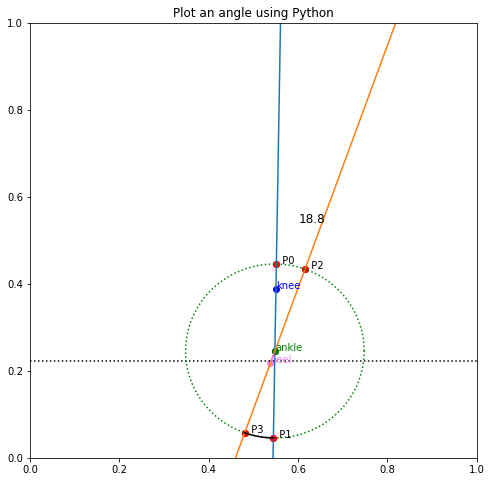

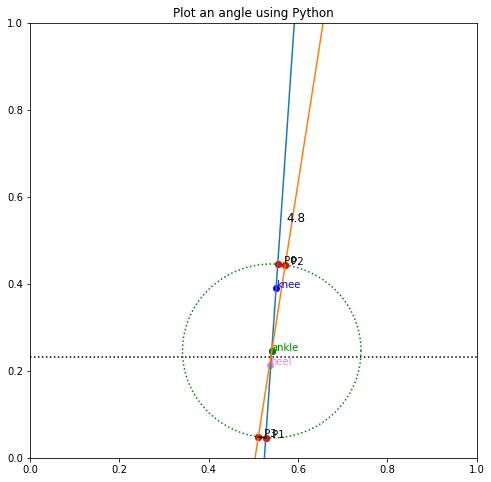

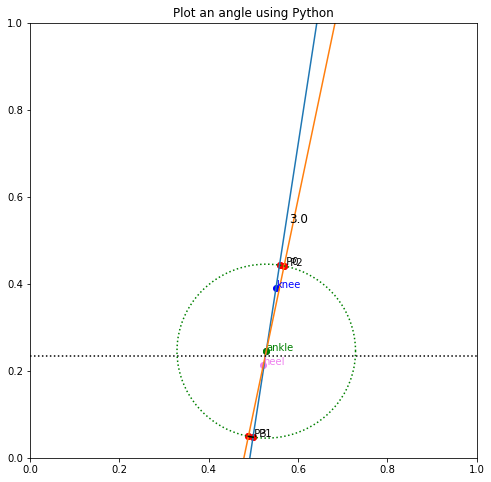

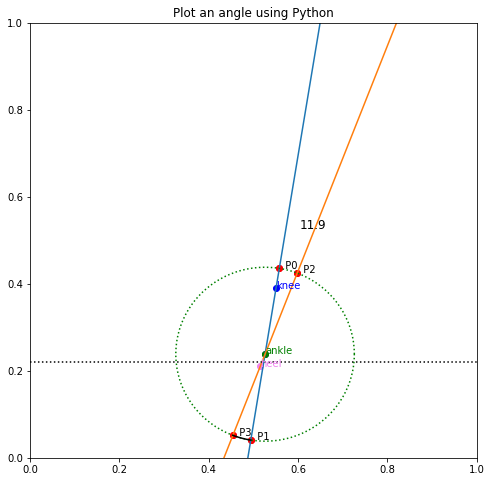

In [1058]:
# print("NEUTRAL FRAMES:")
# for i,frame_step in enumerate(neutral_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in neutral_list[0]:
        plot = drawAngle(f, False)
    print("\n\n")
except:
    print("No Values")



### Supination

In [1059]:
# for i,frame_step in enumerate(supination_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in supination_list[0]:
        drawAngle(f)
    print("\n\n")
except:
    print("No Values")

No Values


### Pronation

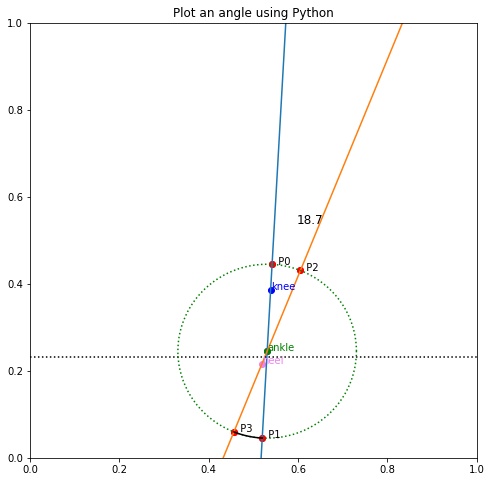

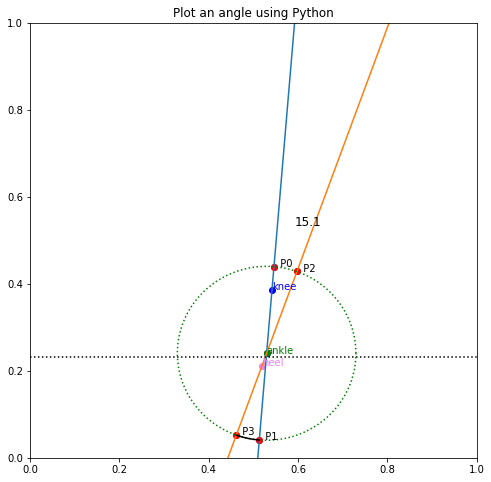

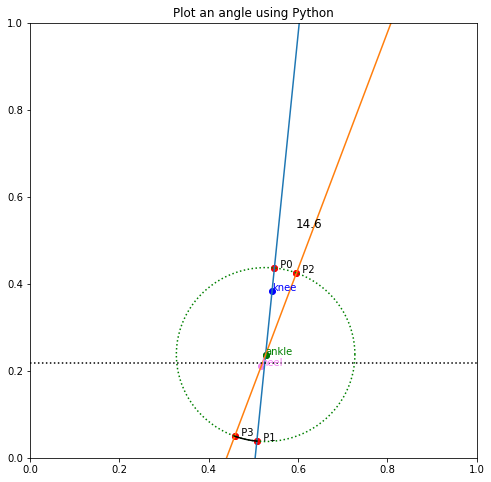

In [1060]:
# for i,frame_step in enumerate(pronation_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_list[0]:
        drawAngle(f)
        print("\n\n")
except Exception as e:
    print(e)

### Strong Pronation

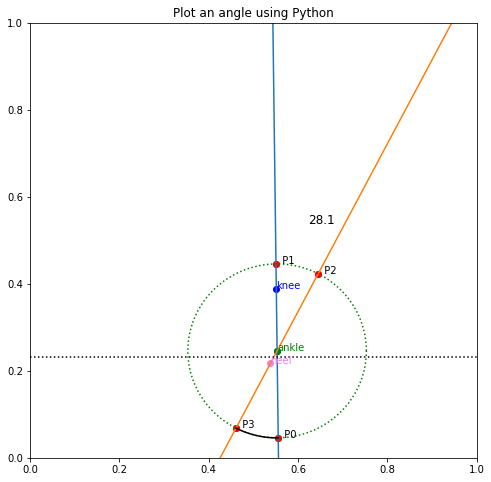

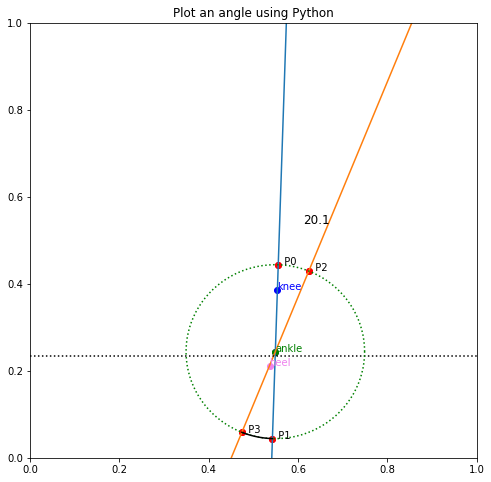

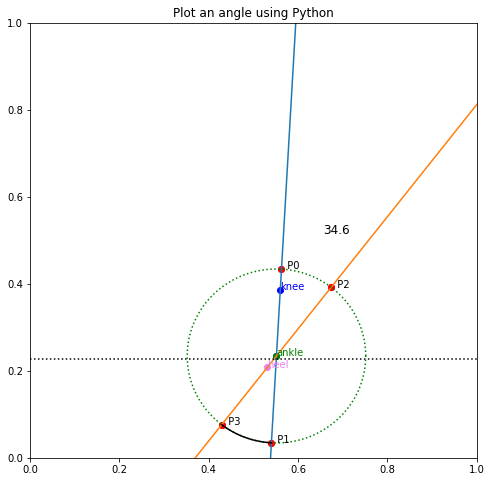

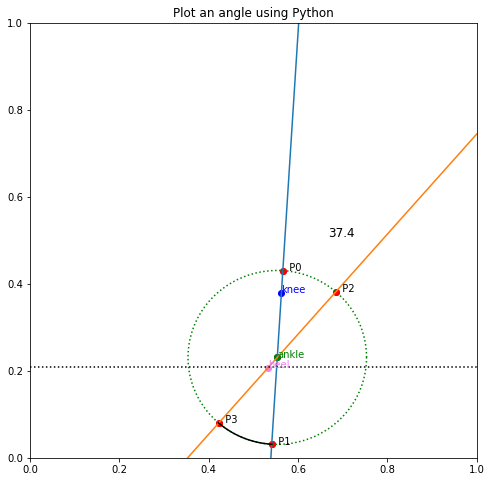

In [1061]:
# for i,frame_step in enumerate(pronation_strong_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_strong_list[0]:
        drawAngle(f)
        print("\n\n")
except:
    print("No Values")

### Winkel Verlauf

In [1062]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
df["angle"]

fig_knee = px.line(df, y="angle", title='Angle')

fig_knee.show()

## Analysis Result (1 Run)

In [1063]:
average_overall = sum(average_list_all) / len(average_list_all)
median = bold(statistics.median(np.round(average_list_all, 1)))
result_pronation_pattern = checkThresholds(0, average_overall, False)
print(f'The runners left foot has a average value of {blue(bold(np.round(average_overall, 2)))} degree at step-out.')
print(f'The Median of the averaged steps the Runner took is {blue(median)}.')
print(f'Thats considered as {blue(bold(result_pronation_pattern))}.')   

The runners left foot has a average value of 25.58 degree at step-out.
The Median of the averaged steps the Runner took is 25.9.
Thats considered as Strong Pronation.


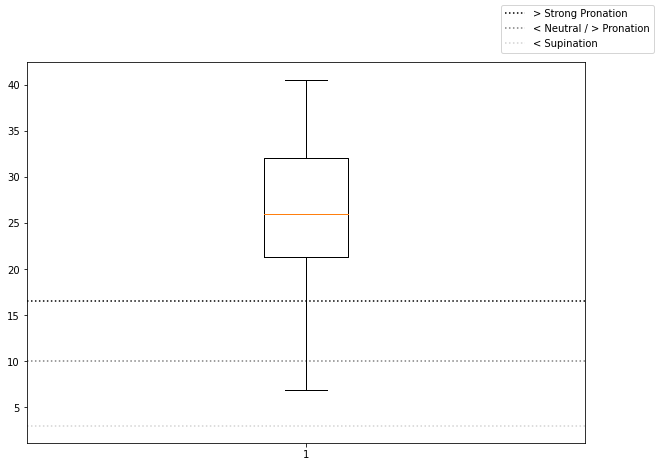

In [1064]:
fig = plt.figure(figsize =(10, 7))
 
plt.axhline(y=16.5, color='black', linestyle='dotted', label='> Strong Pronation')
plt.axhline(y=10, color='grey', linestyle='dotted', label='< Neutral / > Pronation')
plt.axhline(y=3, color='lightgrey', linestyle='dotted', label='< Supination')
plt.boxplot(average_list_all)
fig.legend()
plt.show()

## Save Analysis in File

In [1065]:
result_dict = {RUN: {"FOOT_PATTERN": result_foot_pattern, "PRONATION": {"PATTERN": result_pronation_pattern, "MEAN_ALL": average_overall,"MEAN_STEPS": average_list_all}}}
saveAnalysis(RUN, result_dict)

## Summary of all Run's

In [1066]:
run_list = []
for fileName in csvFiles:
    try:
        pre, ext = os.path.splitext(fileName)
        run = loadAnalysis(pre)
        run_list.append(run)
    except:
        print("Error")
len(run_list)

12

0
1
2
3
4
5
6
Error1:  'MEAN_ALL'
7
8
9
Error1:  'MEAN_ALL'
10
11


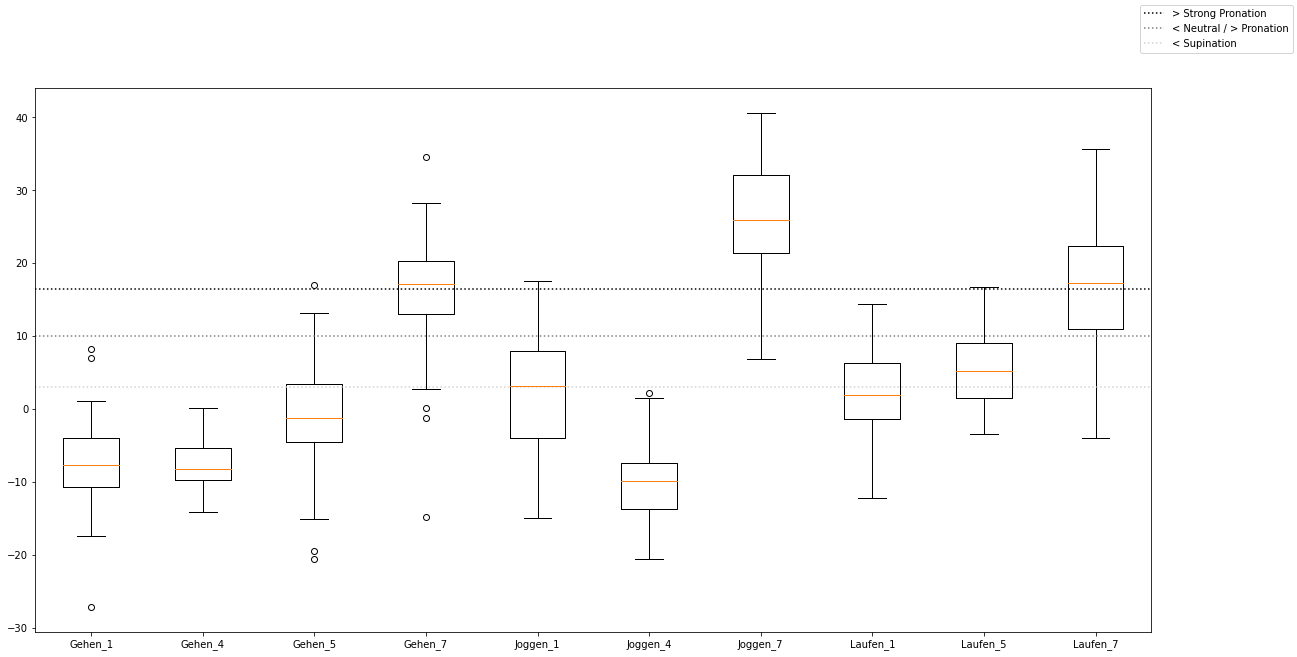

In [1067]:
step_dict = {}
for i, r in enumerate(run_list):
    try: 
        print(i)
        run_name = list(run_list[i].keys())[0]
        values = list(run_list[i].values())
        
        foot_pattern = values[0]["FOOT_PATTERN"]
        result = values[0]["PRONATION"]["PATTERN"]
        mean_all = values[0]["PRONATION"]["MEAN_ALL"]
        mean_steps = values[0]["PRONATION"]["MEAN_STEPS"]

        step_dict[run_name] = mean_steps

    except Exception as e:
        print("Error1: ", e)

try:
    #fig = plt.figure(figsize =(20, 10))
    fig, ax = plt.subplots(figsize =(20, 10))
    ax.boxplot(step_dict.values())
    ax.set_xticklabels(step_dict.keys())
    plt.axhline(y=16.5, color='black', linestyle='dotted', label='> Strong Pronation')
    plt.axhline(y=10, color='grey', linestyle='dotted', label='< Neutral / > Pronation')
    plt.axhline(y=3, color='lightgrey', linestyle='dotted', label='< Supination')
    fig.legend()
    plt.show()
except Exception as e:
    print("Error2: ", e)